# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.


In [11]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

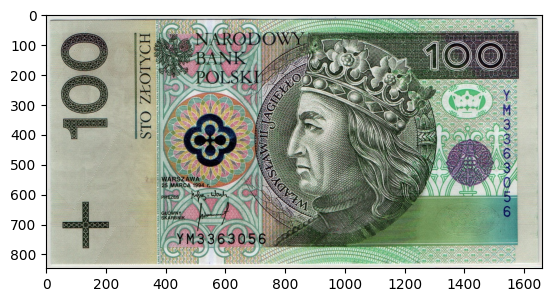

In [12]:
pln = cv2.imread('100zloty.jpg')
pln_shape = pln.shape
plt.imshow(pln)

In [13]:
def split_to_8_layers(image):
    layer_specifiers = [2**i for i in range(8)]
    layers = []
    mask = np.empty(image.shape, dtype='uint8')
    for layer_mask in layer_specifiers:
        mask.fill(layer_mask)
        masked = (image & mask)
        masked = masked.astype('bool').astype('uint8')
        layers.append(masked)
    return layers

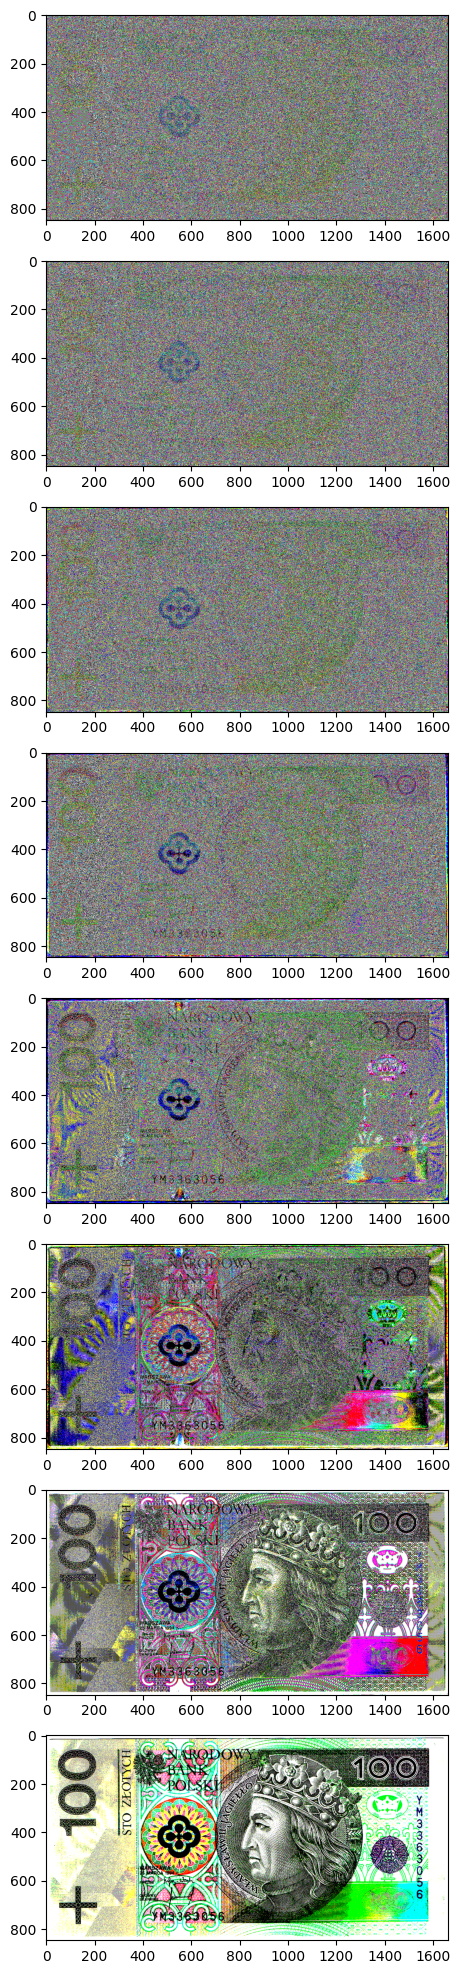

In [14]:
layers = split_to_8_layers(pln)
figure, axes = plt.subplots(len(layers), figsize=(25, 25))

for (ax, layer) in zip(axes, layers):
    ax.imshow(layer*255)

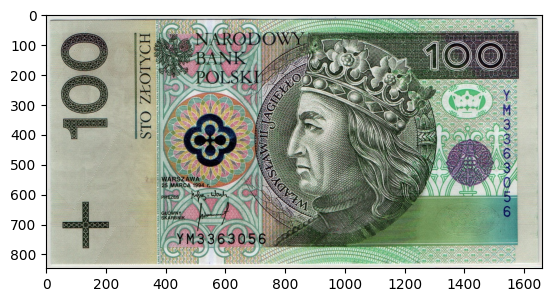

In [15]:
fake_pln = np.zeros(pln.shape, dtype='uint8')
for i, layer in enumerate(layers[::-1]):
    fake_pln = fake_pln*2 + layer
plt.imshow(fake_pln)

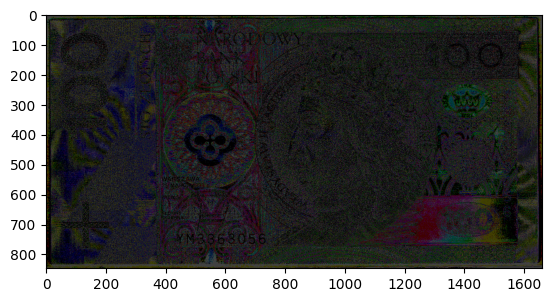

In [16]:
fake_pln_2_6 = np.zeros(pln.shape, dtype='uint8')
fake_pln_2_6 = layers[5]*(2**6) + layers[1]*2
plt.imshow(fake_pln_2_6)